In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("House_Rent_Train.csv")

In [3]:
df1[["locality"]].nunique()

locality    1917
dtype: int64

In [4]:
df1.shape

(20555, 25)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [6]:
df1.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,20532.000000,20532.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000
mean,12.945748,77.637295,0.227049,0.362053,0.174848,0.711603,1062.017465,5.769920,1.858465,4.549922,1.874050,3.801335,1.149523,19056.733148
std,0.029601,0.110525,0.418935,0.480606,0.379846,0.453028,591.207446,6.350989,0.710926,335.154787,2.183982,3.183697,0.993549,8434.029016
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,12.918176,77.572068,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000
50%,12.943790,77.633506,0.000000,0.000000,0.000000,1.000000,1047.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000
75%,12.970979,77.695723,0.000000,1.000000,0.000000,1.000000,1285.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000


In [7]:
df1.corr()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
latitude,1.000000,0.194640,0.034994,0.019427,0.034925,-0.009021,0.006234,0.030712,-0.008546,-0.003164,0.004273,-0.000630,0.049354,0.032816
longitude,0.194640,1.000000,0.245629,0.208098,0.229410,-0.024615,0.075694,-0.136020,0.095944,-0.004139,0.152519,0.201795,0.164931,0.163751
gym,0.034994,0.245629,1.000000,0.645250,0.768926,0.008446,0.290617,-0.179898,0.327705,-0.002622,0.392328,0.526395,0.415595,0.431574
lift,0.019427,0.208098,0.645250,1.000000,0.564135,0.010782,0.307506,-0.180953,0.366610,-0.003868,0.405196,0.530756,0.525742,0.461887
swimming_pool,0.034925,0.229410,0.768926,0.564135,1.000000,0.010602,0.284733,-0.167397,0.321073,-0.002194,0.434190,0.574590,0.382949,0.434513
negotiable,-0.009021,-0.024615,0.008446,0.010782,0.010602,1.000000,0.053548,0.039044,0.059255,0.004697,-0.012547,-0.002279,0.026671,0.062476
property_size,0.006234,0.075694,0.290617,0.307506,0.284733,0.053548,1.000000,-0.008382,0.595013,-0.002574,0.148087,0.226088,0.379641,0.588568
property_age,0.030712,-0.136020,-0.179898,-0.180953,-0.167397,0.039044,-0.008382,1.000000,-0.047170,0.004559,-0.192524,-0.231069,-0.108418,-0.010644
bathroom,-0.008546,0.095944,0.327705,0.366610,0.321073,0.059255,0.595013,-0.047170,1.000000,-0.006363,0.170998,0.265437,0.448805,0.677459
cup_board,-0.003164,-0.004139,-0.002622,-0.003868,-0.002194,0.004697,-0.002574,0.004559,-0.006363,1.000000,-0.002206,-0.003156,-0.006551,-0.001246


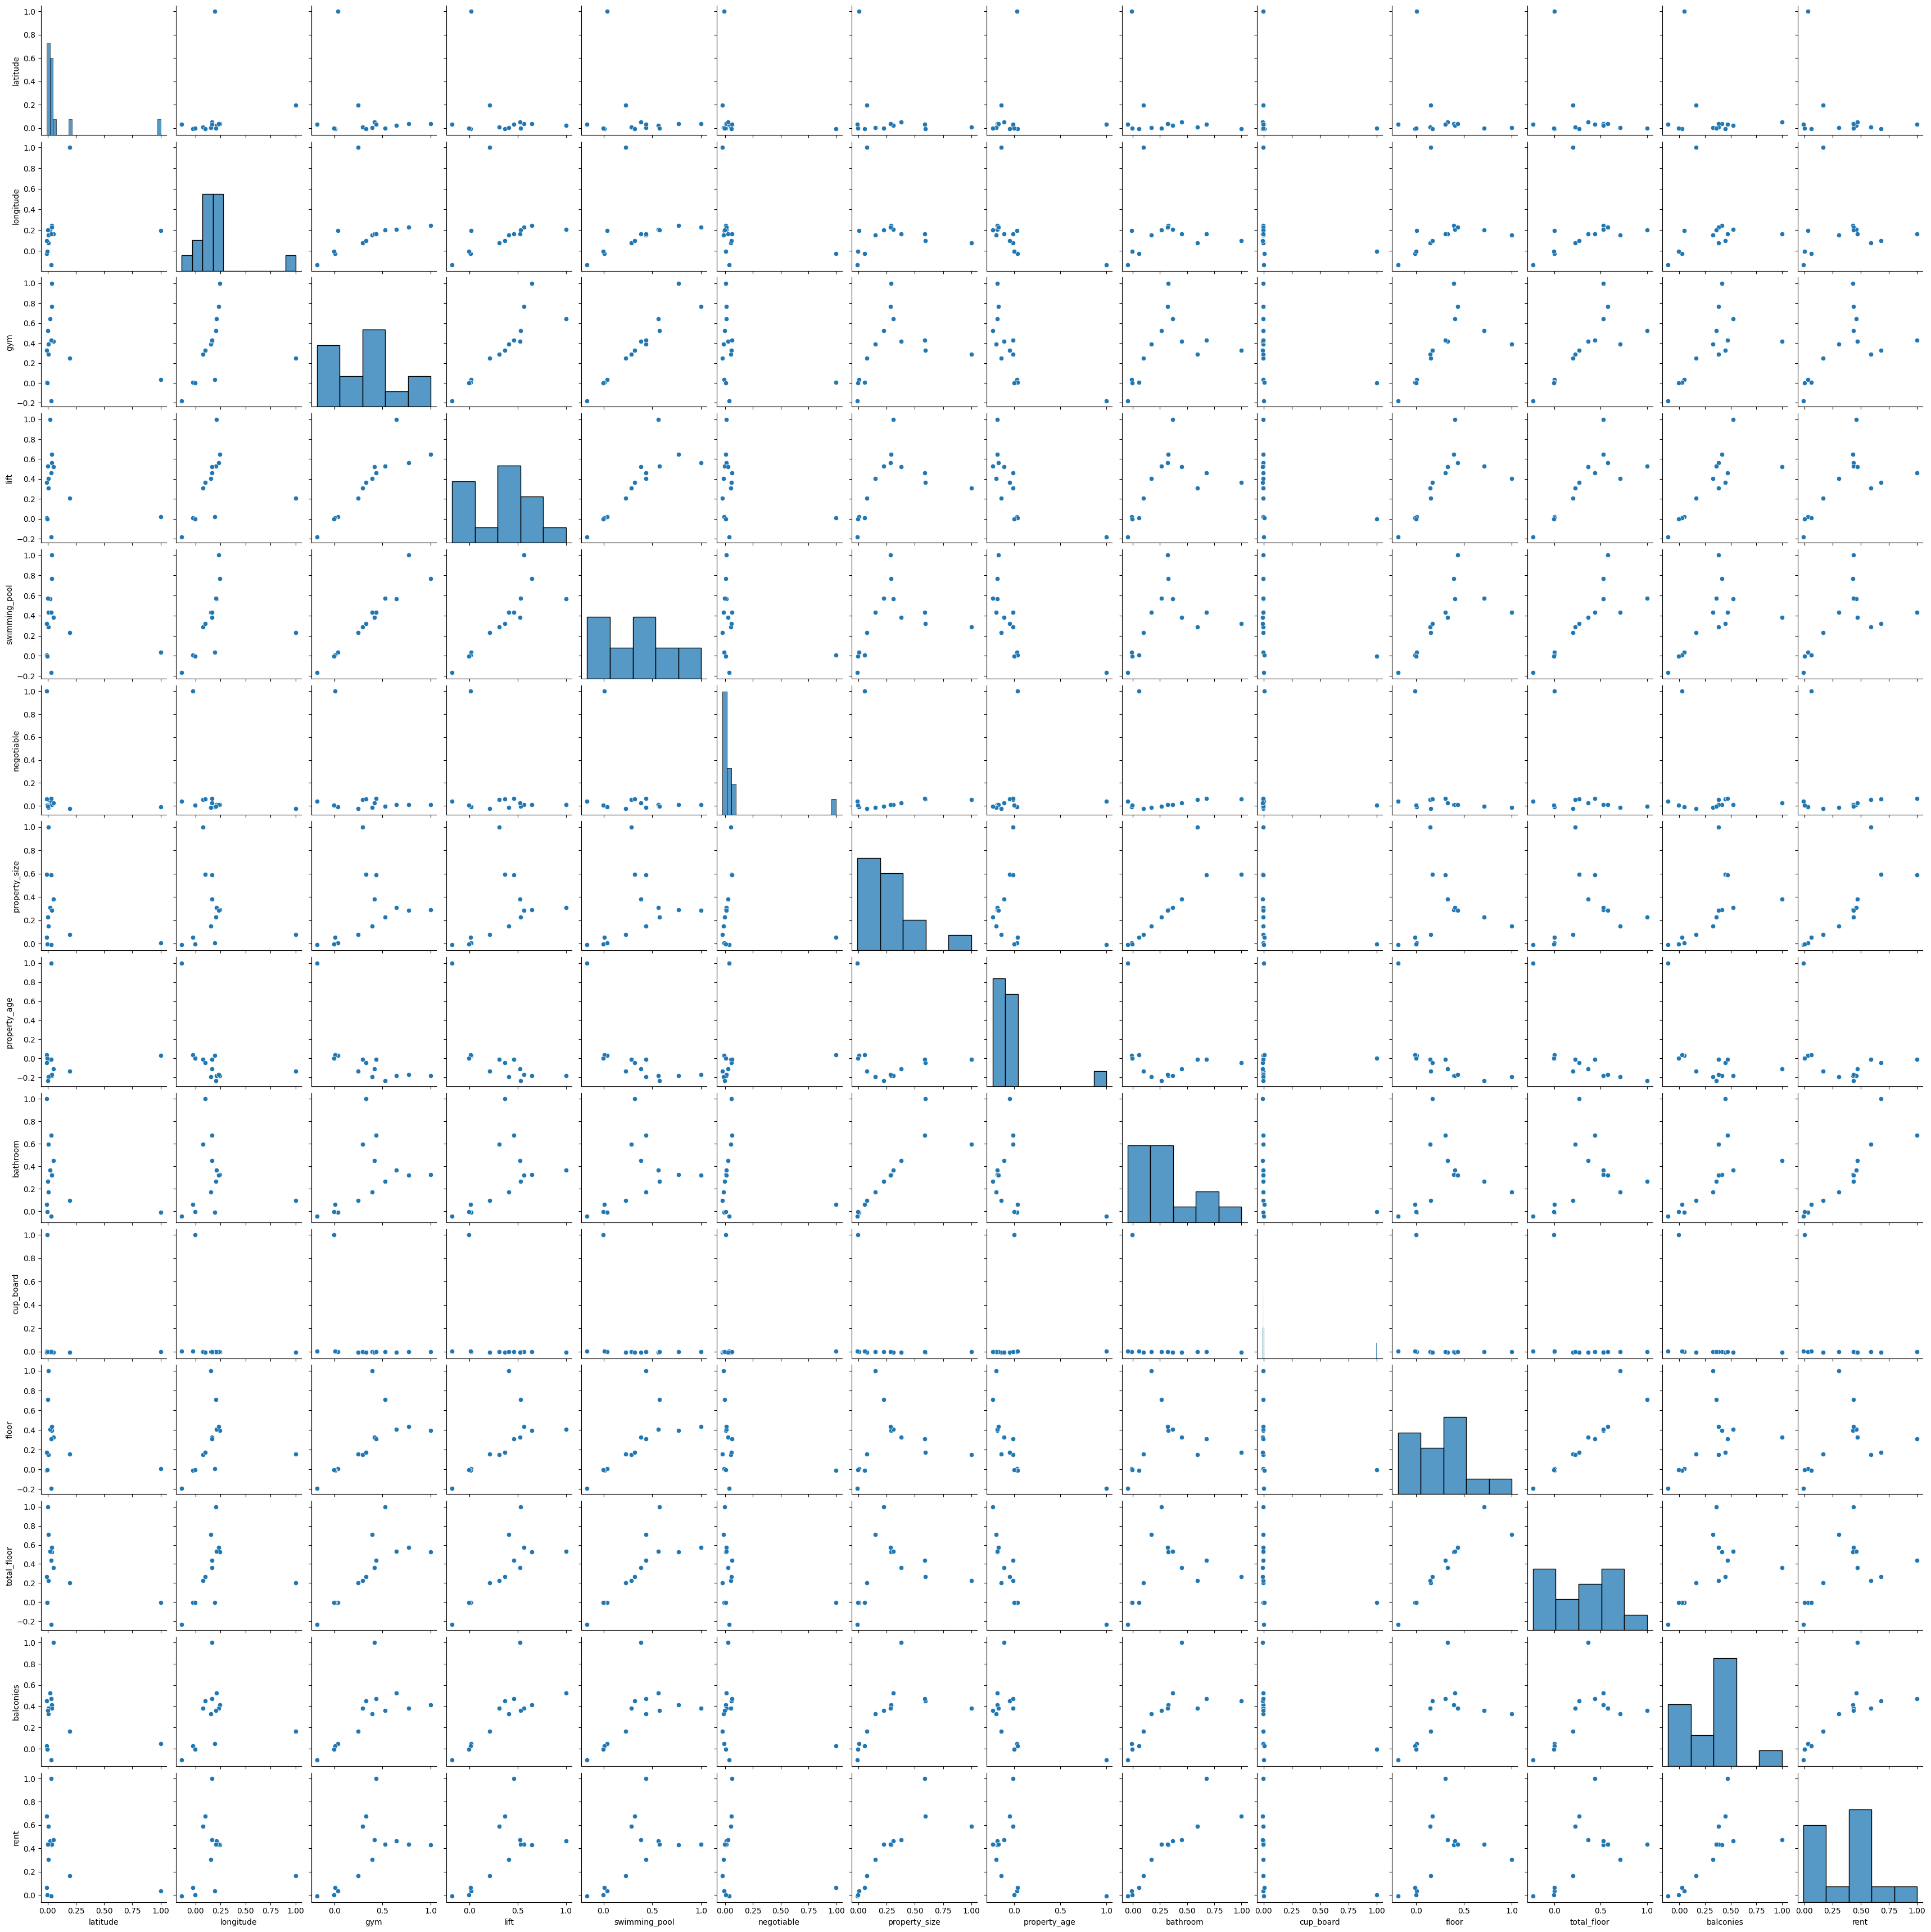

In [7]:
import seaborn as sns
sns.pairplot(df1.corr())

In [8]:
df1.head(5)

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9-10-2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12-6-2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [9]:
df1 = df1.iloc[:20500, :]

In [10]:
df1

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9-10-2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12-6-2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,ff8081815b48bfdd015b4d0e6e720dde,NaN,"Gattigere,RR Nagar",13-12-2017 18:08,12.925380,77.524397,ANYONE,1,1,1,...,3.0,E,3.0,4.0,4.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,25000.0
20496,ff8081815e73c2e2015e74ac10e91975,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,...,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0
20497,ff8081816073f28c016077bb8db47e4f,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,...,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0
20498,ff8081814c6f8c9b014c6febae49016f,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,...,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0


# Data Cleaning

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20500 entries, 0 to 20499
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20500 non-null  object 
 1   type             20494 non-null  object 
 2   locality         20363 non-null  object 
 3   activation_date  20500 non-null  object 
 4   latitude         20500 non-null  float64
 5   longitude        20500 non-null  float64
 6   lease_type       20500 non-null  object 
 7   gym              20500 non-null  int64  
 8   lift             20500 non-null  int64  
 9   swimming_pool    20500 non-null  int64  
 10  negotiable       20500 non-null  int64  
 11  furnishing       20500 non-null  object 
 12  parking          20500 non-null  object 
 13  property_size    20500 non-null  int64  
 14  property_age     20500 non-null  float64
 15  bathroom         20500 non-null  float64
 16  facing           20500 non-null  object 
 17  cup_board   

In [12]:
df1.isna().sum()

id                   0
type                 6
locality           137
activation_date      0
latitude             0
longitude            0
lease_type           0
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age         0
bathroom             0
facing               0
cup_board            0
floor                0
total_floor          0
amenities            0
water_supply         0
building_type        0
balconies            0
rent                 0
dtype: int64

In [13]:
df1["type"] = df1["type"].str.upper()

In [14]:
df1["type"].value_counts()

BHK2        11679
BHK3         4397
BHK1         3597
RK1           553
BHK4          233
BHK4PLUS       31
1BHK1           4
Name: type, dtype: int64

In [15]:
df1['type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', nan],
      dtype=object)

In [16]:
df1["type"].value_counts()

BHK2        11679
BHK3         4397
BHK1         3597
RK1           553
BHK4          233
BHK4PLUS       31
1BHK1           4
Name: type, dtype: int64

In [17]:
df1['type'] = df1['type'].replace('1BHK1','BHK1')

In [18]:
# Calculate the mean of float values
mode_value = df1['type'].mode()
# Fill NaN values with the mean
df1["type"] = df1['type'].fillna("BHK2")

In [19]:
df1['lease_type'].unique()

array(['FAMILY', 'ANYONE', 'BACHELOR', 'COMPANY'], dtype=object)

In [20]:
df1['facing'].unique()

array(['E', 'NE', 'S', 'N', 'SE', 'W', 'NW', 'SW'], dtype=object)

In [21]:
df1['amenities'].unique()

array(['{"LIFT":true,"GYM":true,"INTERNET":true,"AC":false,"CLUB":true,"INTERCOM":true,"POOL":true,"CPA":true,"FS":true,"SERVANT":false,"SECURITY":true,"SC":true,"GP":true,"PARK":false,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}',
       '{"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":true,"SC":true,"GP":false,"PARK":true,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}',
       '{"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":true,"FS":false,"SERVANT":false,"SECURITY":false,"SC":true,"GP":false,"PARK":true,"RWH":false,"STP":false,"HK":false,"PB":true,"VP":true}',
       ...,
       '{"LIFT":true,"GYM":true,"INTERNET":true,"AC":false,"CLUB":true,"INTERCOM":true,"POOL":true,"CPA":true,"FS":true,"SERVANT":false,"SECURITY":true,"SC":true,"GP":true,"PARK":false,"RWH":false,"STP":false,"HK":true,"PB":true,"VP":true}',
       

In [22]:
df1['amenities'][0]

'{"LIFT":true,"GYM":true,"INTERNET":true,"AC":false,"CLUB":true,"INTERCOM":true,"POOL":true,"CPA":true,"FS":true,"SERVANT":false,"SECURITY":true,"SC":true,"GP":true,"PARK":false,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}'

In [23]:
# Creating new columns for amenities
amenities_columns = df1['amenities'][0].replace("true", "True").replace("false", "False")
amenities_dict = eval(amenities_columns)
for amenity in amenities_dict.keys():
    df1[amenity] = df1['amenities'].apply(lambda x: eval(x.replace("true", "True").replace("false", "False")).get(amenity, False))

# Dropping the original 'amenities' column
df1.drop(columns=['amenities'], inplace=True)

df1

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,False,True,True,True,False,True,True,False,True,True
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9-10-2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,False,True,True,False,True,True,True,False,True,True
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12-6-2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,False,False,True,False,True,False,False,False,True,True
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,ff8081815b48bfdd015b4d0e6e720dde,BHK2,"Gattigere,RR Nagar",13-12-2017 18:08,12.925380,77.524397,ANYONE,1,1,1,...,False,True,True,False,False,False,False,False,True,True
20496,ff8081815e73c2e2015e74ac10e91975,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,...,False,False,True,False,True,True,False,False,False,False
20497,ff8081816073f28c016077bb8db47e4f,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,...,False,True,False,False,True,False,False,False,True,False
20498,ff8081814c6f8c9b014c6febae49016f,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,...,False,True,True,False,True,False,False,True,True,True


In [24]:
print("The shape of the dataset", df1.shape)
print("The columns present in the dataset", df1.columns)

The shape of the dataset (20500, 43)
The columns present in the dataset Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'water_supply',
       'building_type', 'balconies', 'rent', 'LIFT', 'GYM', 'INTERNET', 'AC',
       'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC',
       'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP'],
      dtype='object')


In [25]:
df1 = df1.drop(columns = ['id', 'LIFT', 'GYM', 'activation_date'])

In [26]:
df1.head(5)

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,BHK2,NaN,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,...,False,True,True,True,False,True,True,False,True,True
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,...,False,True,True,False,True,True,True,False,True,True
2,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,...,False,False,True,False,True,False,False,False,True,True
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,False,False,False,False,False,False,False,False,False,False
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,False,False,False,False,True,False,False,False,False,True


In [27]:
df1.isna().sum()

type               0
locality         137
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
water_supply       0
building_type      0
balconies          0
rent               0
INTERNET           0
AC                 0
CLUB               0
INTERCOM           0
POOL               0
CPA                0
FS                 0
SERVANT            0
SECURITY           0
SC                 0
GP                 0
PARK               0
RWH                0
STP                0
HK                 0
PB                 0
VP                 0
dtype: int64

In [28]:
# Putting the numeric boolean values
df1 = df1.replace({True: 1, False: 0}, regex=True)

df1.columns = [col.upper() for col in df1.columns]

df1 = df1.T.drop_duplicates().T

In [29]:
df1.head(5)

,TYPE,LOCALITY,LATITUDE,LONGITUDE,LEASE_TYPE,GYM,LIFT,SWIMMING_POOL,NEGOTIABLE,FURNISHING,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,BHK2,NaN,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,...,0,1,1,1,0,1,1,0,1,1
1,BHK2,Bellandur,12.929557,77.67228,ANYONE,0,1,0,1,SEMI_FURNISHED,...,0,1,1,0,1,1,1,0,1,1
2,BHK3,Thiruvanmiyur,12.98287,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,...,0,0,1,0,1,0,0,0,1,1
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,0,0,0,0,0,0,0,0,0,0
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,0,0,0,0,1,0,0,0,0,1


In [30]:
df1.columns

Index(['TYPE', 'LOCALITY', 'LATITUDE', 'LONGITUDE', 'LEASE_TYPE', 'GYM',
       'LIFT', 'SWIMMING_POOL', 'NEGOTIABLE', 'FURNISHING', 'PARKING',
       'PROPERTY_SIZE', 'PROPERTY_AGE', 'BATHROOM', 'FACING', 'CUP_BOARD',
       'FLOOR', 'TOTAL_FLOOR', 'WATER_SUPPLY', 'BUILDING_TYPE', 'BALCONIES',
       'RENT', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS',
       'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB',
       'VP'],
      dtype='object')

In [31]:
# AP: Apartment
# IH: Independent House
# IF: Independent Floor
# GC: Guest House / Guest Cottage

df1["BUILDING_TYPE"].unique()

array(['AP', 'IH', 'IF', 'GC'], dtype=object)

In [32]:
df1[["LOCALITY"]].value_counts()

LOCALITY                                                 
Whitefield                                                   901
HSR Layout                                                   682
Banashankari                                                 644
Marathahalli                                                 473
Mahadevapura                                                 432
                                                            ... 
Hoodi , Saketha Nagar, Hoodi, Bengaluru, Karnataka, India      1
Hoodi ,                                                        1
Hemanth Nagar                                                  1
Heggondahalli, Gunjur Post                                     1
wilson garden                                                  1
Length: 1917, dtype: int64

# Encodings

In [33]:
"""ordinal_mapping = {'FAMILY': 1, 'ANYONE': 2, 'BACHELOR': 3, 'COMPANY': 4}

# Perform ordinal encoding using the mapping
df2['LEASE_TYPE'] = df2['LEASE_TYPE'].map(ordinal_mapping)

ordinal_mapping = {'NOT_FURNISHED': 0, 'SEMI_FURNISHED': 1, 'FULLY_FURNISHED': 2}

# Perform ordinal encoding using the mapping
df2['FURNISHING'] = df2['FURNISHING'].map(ordinal_mapping)

ordinal_mapping = {'TWO_WHEELER': 1, 'FOUR_WHEELER': 2, 'BOTH': 3, 'NONE': 0}

# Perform ordinal encoding using the mapping
df2['PARKING'] = df2['PARKING'].map(ordinal_mapping)

ordinal_mapping = {'TWO_WHEELER': 1, 'FOUR_WHEELER': 2, 'BOTH': 3, 'NONE': 0}

# Perform ordinal encoding using the mapping
df2['PARKING'] = df2['PARKING'].map(ordinal_mapping)

df2["FACING"].unique()"""



'ordinal_mapping = {\'FAMILY\': 1, \'ANYONE\': 2, \'BACHELOR\': 3, \'COMPANY\': 4}\n\n# Perform ordinal encoding using the mapping\ndf2[\'LEASE_TYPE\'] = df2[\'LEASE_TYPE\'].map(ordinal_mapping)\n\nordinal_mapping = {\'NOT_FURNISHED\': 0, \'SEMI_FURNISHED\': 1, \'FULLY_FURNISHED\': 2}\n\n# Perform ordinal encoding using the mapping\ndf2[\'FURNISHING\'] = df2[\'FURNISHING\'].map(ordinal_mapping)\n\nordinal_mapping = {\'TWO_WHEELER\': 1, \'FOUR_WHEELER\': 2, \'BOTH\': 3, \'NONE\': 0}\n\n# Perform ordinal encoding using the mapping\ndf2[\'PARKING\'] = df2[\'PARKING\'].map(ordinal_mapping)\n\nordinal_mapping = {\'TWO_WHEELER\': 1, \'FOUR_WHEELER\': 2, \'BOTH\': 3, \'NONE\': 0}\n\n# Perform ordinal encoding using the mapping\ndf2[\'PARKING\'] = df2[\'PARKING\'].map(ordinal_mapping)\n\ndf2["FACING"].unique()'

# Reverse Geocoding


from geopy.geocoders import Nominatim

Latitude = '12.934471'
Longitude = '77.634471'

geolocator = Nominatim(user_agent="geoapiExercises")
location = geolocator.reverse(Latitude + "," + Longitude, exactly_one=True)

if location:
    address = location.raw.get('address', {})
    district = address.get('District', address['city'])
    print("District:", district)
else:
    print("Location information not available.")
location

In [34]:
import pandas as pd
from geopy.geocoders import Nominatim

# Initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="reverse_geocoding")

# Function to perform reverse geocoding and fill None values
def fill_place_name(row):
    if pd.isnull(row['LOCALITY']):
        try:
            location = geolocator.reverse(str(row['LATITUDE']) + "," + str(row['LONGITUDE']), exactly_one=True)
            if location:
                
                address = location.raw.get('address', {})
                district = address.get('District', address['city'])
                return district
            
        except:
            pass
        
    return row['LOCALITY']

# Apply the reverse geocoding function to fill None values
df1['LOCALITY'] = df1.apply(fill_place_name, axis=1)

df1.head(5)

,TYPE,LOCALITY,LATITUDE,LONGITUDE,LEASE_TYPE,GYM,LIFT,SWIMMING_POOL,NEGOTIABLE,FURNISHING,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,BHK2,Bengaluru,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,...,0,1,1,1,0,1,1,0,1,1
1,BHK2,Bellandur,12.929557,77.67228,ANYONE,0,1,0,1,SEMI_FURNISHED,...,0,1,1,0,1,1,1,0,1,1
2,BHK3,Thiruvanmiyur,12.98287,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,...,0,0,1,0,1,0,0,0,1,1
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,0,0,0,0,0,0,0,0,0,0
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,0,0,0,0,1,0,0,0,0,1


In [35]:
# Define rent ranges and corresponding labels
rent_ranges = [(0, 10000), (10001, 20000), (20001, 30000), (30001, 50000)]  # Define your ranges
labels = ['Low', 'Medium', 'High', 'Very High']

# Map locality to label based on rent range
def map_locality(row):
    for i, (low, high) in enumerate(rent_ranges):
        if low <= row['RENT'] <= high:
            return labels[i]
    return 'Unknown'

df1['LOCALITY'] = df1.apply(map_locality, axis=1)

In [36]:
# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the categorical column
df1["TYPE"] = encoder.fit_transform(df1[["TYPE"]])
df1["LOCALITY"] = encoder.fit_transform(df1[["LOCALITY"]])
df1["LEASE_TYPE"] = encoder.fit_transform(df1[["LEASE_TYPE"]])
df1["FURNISHING"] = encoder.fit_transform(df1[["FURNISHING"]])
df1["PARKING"] = encoder.fit_transform(df1[["PARKING"]])
df1["FACING"] = encoder.fit_transform(df1[["FACING"]])
df1["WATER_SUPPLY"] = encoder.fit_transform(df1[["WATER_SUPPLY"]])
df1["BUILDING_TYPE"] = encoder.fit_transform(df1[["BUILDING_TYPE"]])

In [37]:
# Find columns with numerical features
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Find columns with categorical features
categorical_columns = df1.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical_columns", numerical_columns)
print("categorical_columns", categorical_columns)

Numerical_columns ['TYPE', 'LOCALITY', 'LEASE_TYPE', 'FURNISHING', 'PARKING', 'FACING', 'WATER_SUPPLY', 'BUILDING_TYPE']
categorical_columns ['LATITUDE', 'LONGITUDE', 'GYM', 'LIFT', 'SWIMMING_POOL', 'NEGOTIABLE', 'PROPERTY_SIZE', 'PROPERTY_AGE', 'BATHROOM', 'CUP_BOARD', 'FLOOR', 'TOTAL_FLOOR', 'BALCONIES', 'RENT', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP']


In [38]:
df1 = df1.apply(pd.to_numeric, errors='coerce')
df1.isna().sum()

TYPE             0
LOCALITY         0
LATITUDE         0
LONGITUDE        0
LEASE_TYPE       0
GYM              0
LIFT             0
SWIMMING_POOL    0
NEGOTIABLE       0
FURNISHING       0
PARKING          0
PROPERTY_SIZE    0
PROPERTY_AGE     0
BATHROOM         0
FACING           0
CUP_BOARD        0
FLOOR            0
TOTAL_FLOOR      0
WATER_SUPPLY     0
BUILDING_TYPE    0
BALCONIES        0
RENT             0
INTERNET         0
AC               0
CLUB             0
INTERCOM         0
POOL             0
CPA              0
FS               0
SERVANT          0
SECURITY         0
SC               0
GP               0
PARK             0
RWH              0
STP              0
HK               0
PB               0
VP               0
dtype: int64

In [39]:
df1.head(10)

,TYPE,LOCALITY,LATITUDE,LONGITUDE,LEASE_TYPE,GYM,LIFT,SWIMMING_POOL,NEGOTIABLE,FURNISHING,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,1.0,3.0,12.934471,77.634471,3.0,1,1,1,0,2.0,...,0,1,1,1,0,1,1,0,1,1
1,1.0,0.0,12.929557,77.672280,0.0,0,1,0,1,2.0,...,0,1,1,0,1,1,1,0,1,1
2,2.0,0.0,12.982870,80.262012,3.0,0,1,0,0,2.0,...,0,0,1,0,1,0,0,0,1,1
3,0.0,1.0,12.955991,77.531634,3.0,0,0,0,1,2.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,3.0,12.963903,77.649446,3.0,0,0,0,1,2.0,...,0,0,0,0,1,0,0,0,0,1
5,0.0,2.0,12.986196,77.718314,3.0,1,1,1,1,2.0,...,0,1,0,0,0,0,0,0,1,0
6,2.0,3.0,12.967144,77.750662,0.0,1,1,1,1,0.0,...,1,1,1,0,1,1,1,1,1,1
7,1.0,0.0,12.917414,77.631764,0.0,0,0,0,1,2.0,...,0,0,1,0,0,0,0,0,1,1
8,1.0,1.0,12.923301,77.556324,0.0,0,0,0,0,2.0,...,0,1,1,0,1,0,0,0,0,0
9,1.0,2.0,12.972697,77.751880,0.0,1,1,0,1,2.0,...,1,1,0,0,1,1,1,1,1,0


In [40]:
df1.corr()

,TYPE,LOCALITY,LATITUDE,LONGITUDE,LEASE_TYPE,GYM,LIFT,SWIMMING_POOL,NEGOTIABLE,FURNISHING,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
TYPE,1.000000,-0.012529,-0.008760,0.014550,0.001068,0.146184,0.166317,0.150230,0.032693,-0.035962,...,0.078763,0.151571,-0.008741,0.066960,0.047856,0.110973,0.084559,0.108838,0.183067,0.107165
LOCALITY,-0.012529,1.000000,-0.030937,-0.075099,-0.015402,-0.103714,-0.141171,-0.054814,-0.002016,0.006951,...,0.056622,-0.115953,0.038772,0.016146,-0.002013,-0.052546,-0.041400,-0.066886,-0.128854,-0.040204
LATITUDE,-0.008760,-0.030937,1.000000,0.194742,0.002966,0.035853,0.019632,0.034771,-0.009285,-0.037626,...,0.012338,0.028020,-0.008686,-0.027577,-0.019029,0.021647,0.032554,0.009736,0.042950,0.027601
LONGITUDE,0.014550,-0.075099,0.194742,1.000000,-0.042485,0.245978,0.208302,0.229751,-0.024382,-0.032098,...,0.074451,0.227159,-0.010022,0.056335,0.070087,0.160269,0.182560,0.180360,0.256361,0.187266
LEASE_TYPE,0.001068,-0.015402,0.002966,-0.042485,1.000000,0.042095,0.065528,0.040283,-0.043759,0.065673,...,-0.010224,0.040769,-0.041886,0.014009,-0.019996,0.014737,-0.010534,0.000794,0.050746,0.006811
GYM,0.146184,-0.103714,0.035853,0.245978,0.042095,1.000000,0.645255,0.769686,0.008972,-0.062608,...,0.212051,0.522857,-0.009983,0.249491,0.224871,0.386233,0.433808,0.427787,0.587008,0.441984
LIFT,0.166317,-0.141171,0.019632,0.208302,0.065528,0.645255,1.000000,0.564949,0.011361,-0.052117,...,0.182706,0.692616,-0.062654,0.222362,0.132256,0.395415,0.362618,0.411543,0.711518,0.421938
SWIMMING_POOL,0.150230,-0.054814,0.034771,0.229751,0.040283,0.769686,0.564949,1.000000,0.010066,-0.052515,...,0.225296,0.463617,0.017121,0.270404,0.263691,0.366249,0.452766,0.411659,0.526278,0.459040
NEGOTIABLE,0.032693,-0.002016,-0.009285,-0.024382,-0.043759,0.008972,0.011361,0.010066,1.000000,0.021375,...,-0.001475,0.007685,0.039088,0.030126,0.042151,0.038921,0.021858,0.024094,0.026205,0.038059
FURNISHING,-0.035962,0.006951,-0.037626,-0.032098,0.065673,-0.062608,-0.052117,-0.052515,0.021375,1.000000,...,-0.020549,-0.057577,0.007081,-0.048460,-0.005724,-0.024821,-0.049150,-0.053793,-0.086476,-0.049277


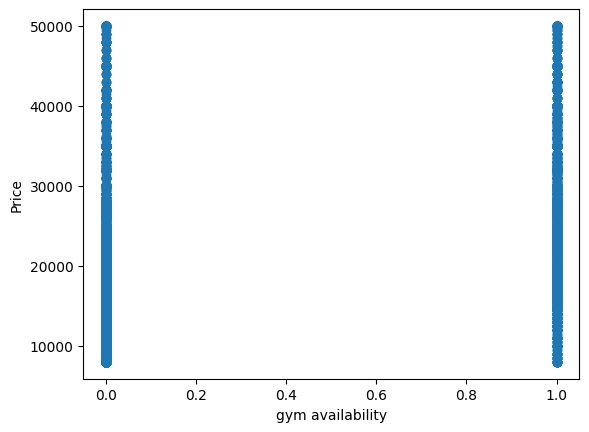

In [41]:
plt.scatter(df1['GYM'], df1['RENT'])
plt.xlabel("gym availability")
plt.ylabel("Price")
plt.show()

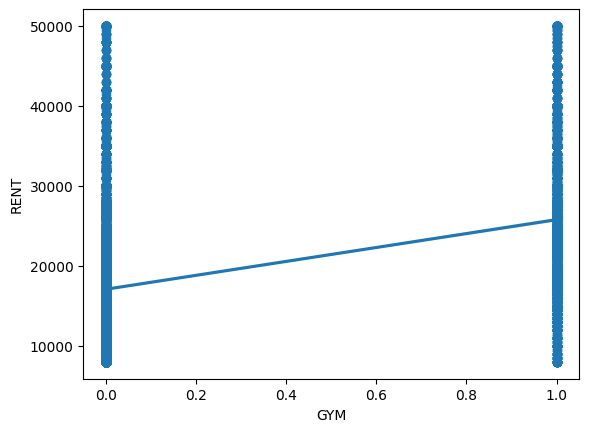

In [43]:
import seaborn as sns
sns.regplot(x = "GYM", y="RENT", data = df1 )
plt.show()

In [44]:
df1.columns

Index(['TYPE', 'LOCALITY', 'LATITUDE', 'LONGITUDE', 'LEASE_TYPE', 'GYM',
       'LIFT', 'SWIMMING_POOL', 'NEGOTIABLE', 'FURNISHING', 'PARKING',
       'PROPERTY_SIZE', 'PROPERTY_AGE', 'BATHROOM', 'FACING', 'CUP_BOARD',
       'FLOOR', 'TOTAL_FLOOR', 'WATER_SUPPLY', 'BUILDING_TYPE', 'BALCONIES',
       'RENT', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS',
       'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB',
       'VP'],
      dtype='object')

In [45]:
## Independent and dependent features

y = df1[["RENT"]]
X = df1.drop(columns = ["RENT", "LATITUDE", "LONGITUDE", "VP"])

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the dataset

In [47]:
#standardizing the datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.18831301,  0.58192675, -1.03336775, ..., -0.45198279,
        -0.49733087, -0.76045309],
       [-0.18831301,  0.58192675,  0.99567377, ..., -0.45198279,
        -0.49733087, -0.76045309],
       [-0.18831301, -1.46561641,  0.99567377, ..., -0.45198279,
        -0.49733087, -0.76045309],
       ...,
       [-1.27384319,  0.58192675,  0.99567377, ..., -0.45198279,
        -0.49733087, -0.76045309],
       [-0.18831301, -1.46561641,  0.99567377, ..., -0.45198279,
        -0.49733087,  1.3150055 ],
       [-0.18831301,  0.58192675,  0.99567377, ..., -0.45198279,
        -0.49733087,  1.3150055 ]])

# Model Training

In [48]:
#importing the regressor
from sklearn.linear_model import LinearRegression

Linreg = LinearRegression()
Linreg.fit(X_train, y_train)

##coefficients printing
print(Linreg.coef_)

[[ 454.99583706  342.03044929 -121.68082496   79.7033878   381.45422866
  -383.05319692   93.7603555  -576.78908529 -585.64570999 3363.59421225
   632.78219292 1899.52265171   57.58631577   18.21465743   26.88853522
  1373.82070871  167.16488023  198.7481659   153.7443218   -30.84066985
   488.93667707  120.01465377  187.02833788  729.85404992 -131.61502841
    -9.58044613   12.41871481   41.87193629  -45.73044006  167.77404597
    30.08510959   33.18093765  -64.83327677  -27.40056989  298.90287359]]


In [49]:
##Intercept printing
print(Linreg.intercept_)

[19091.38560976]


In [50]:
##On which parameters the model has been trained
Linreg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [51]:
##predicting the values
y_pred = Linreg.predict(X_test)

# Model Evaluation

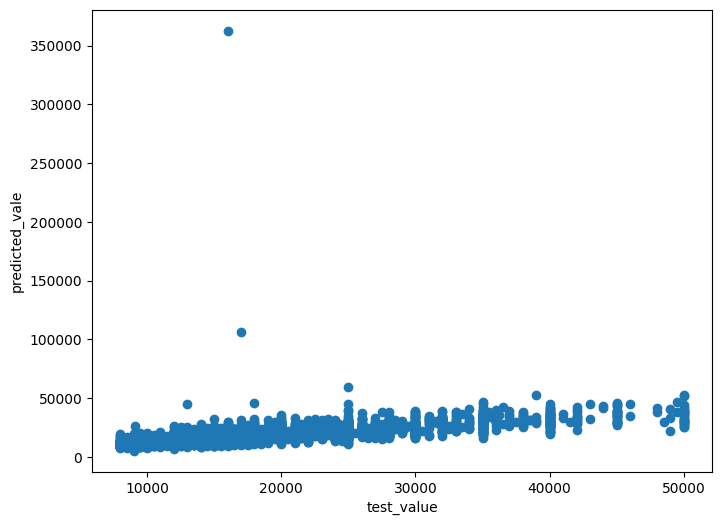

In [52]:
## plot between predicted values and original(test) values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
#plt.hist(df1, bins=30, density=True, alpha=0.6, color='blue', label='Data Histogram')
#plt.plot(y_test, y_pred, color='red', label='Gaussian Distribution')

plt.scatter(y_test, y_pred)
plt.xlabel("test_value")
plt.ylabel("predicted_vale")
plt.show()

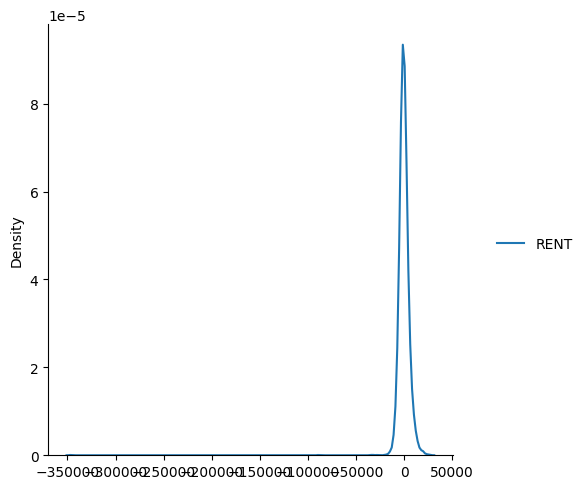

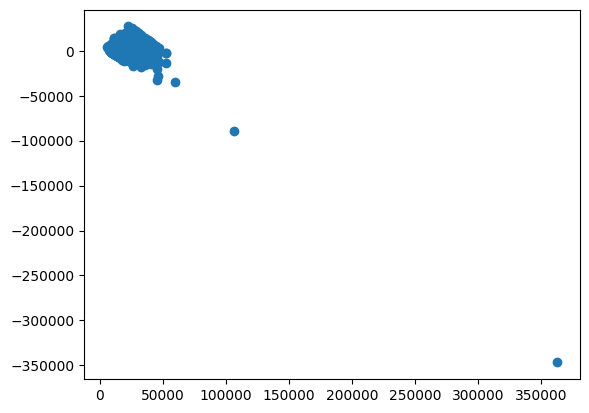

In [53]:
## residuals(errors)
residuals = y_test - y_pred

## plotting the residuals
sns.displot(residuals, kind = 'kde')
plt.show()
## scatter plot with respect to residuals and predicted values
## uniform distribution
plt.scatter(y_pred, residuals)
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score


# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 55102063.65435103
R-squared: 0.20390797137477312


In [55]:
len(X_train)

16400

# Removing Outliers

In [56]:
import numpy as np
from scipy import stats

def remove_outliers(data, z_threshold = 3):
    
    """
    Remove outliers from a dataset using Z-score.
    
    Parameters:
    - data: NumPy array or Pandas DataFrame containing the data.
    - z_threshold: Z-score threshold for outlier detection (default is 3).
    
    Returns:
    - Cleaned data with outliers removed.
    """
    
    z_scores = np.abs(stats.zscore(data))
    outlier_mask = z_scores <= z_threshold
    
    return data[outlier_mask.all(axis=1)]

# Select only the independent columns (features)
independent_columns = df1.columns

# Apply outlier removal to the selected columns
df_cleaned = remove_outliers(df1[independent_columns])

In [57]:
df_cleaned

,TYPE,LOCALITY,LATITUDE,LONGITUDE,LEASE_TYPE,GYM,LIFT,SWIMMING_POOL,NEGOTIABLE,FURNISHING,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
1,1.0,0.0,12.929557,77.672280,0.0,0,1,0,1,2.0,...,0,1,1,0,1,1,1,0,1,1
3,0.0,1.0,12.955991,77.531634,3.0,0,0,0,1,2.0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,2.0,12.986196,77.718314,3.0,1,1,1,1,2.0,...,0,1,0,0,0,0,0,0,1,0
7,1.0,0.0,12.917414,77.631764,0.0,0,0,0,1,2.0,...,0,0,1,0,0,0,0,0,1,1
8,1.0,1.0,12.923301,77.556324,0.0,0,0,0,0,2.0,...,0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,1.0,0.0,12.925380,77.524397,0.0,1,1,1,1,2.0,...,0,1,1,0,0,0,0,0,1,1
20496,1.0,0.0,12.931072,77.632361,0.0,0,0,0,1,2.0,...,0,0,1,0,1,1,0,0,0,0
20497,1.0,2.0,12.901800,77.566597,3.0,1,1,0,1,2.0,...,0,1,0,0,1,0,0,0,1,0
20498,1.0,0.0,12.965502,77.647694,3.0,0,1,0,0,2.0,...,0,1,1,0,1,0,0,1,1,1


In [58]:
# Separate features and target
y = df_cleaned['RENT']
X = df_cleaned.drop(columns = ['RENT', 'LATITUDE', 'LONGITUDE', 'VP'])

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
r2


0.6067598307021436

In [59]:
np.sqrt(((y_pred - y_test) ** 2).mean())

4252.141321776537

# Model Performance Optimization

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [61]:
#Logistic regression classifier
#penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. 
#Other options are 'l1', 'elasticnet', and 'none'.
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')

#Support vector machine classifier
#kernel trick is used for non-linear data, gamma values helps to define the boundary-size
#models with very large gamma values tend to overfit
#mostly the gamma ranges between 0.0001 to 10
svc = SVC(kernel='sigmoid', gamma=1.0)

#K-nearest neighbors classifier
knc = KNeighborsClassifier()

#decision tree classifier
dtc = DecisionTreeClassifier(max_depth=5)

#random forest classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

#adaboost classifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

#bagging classifier
bc = BaggingClassifier(n_estimators=50, random_state=2)

#extra trees classifier -  similiar to random forest classification
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [62]:
clfs = {
    lrc  : 'logistic regression',
    svc  : 'support vector machine',
    knc  : 'k-nearest neighbors',
    dtc  : 'decision tree',
    rfc  : 'random forest',
    abc  : 'adaboost',
    bc   : 'bagging',
    etc  : 'extra-tree'
}

In [63]:
def fit__models(clf, X_train, X_test, y_train, y_test):
    acc_pre = []
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = r2_score(y_test, y_pred)
    prs = np.sqrt(((y_pred - y_test) ** 2).mean())
    acc_pre += [acc]
    acc_pre += [prs]
    return acc_pre

In [64]:
accuracy  = []
precision = []
for clf, name  in clfs.items():
    acc_prec = fit__models(clf, X_train, X_test, y_train, y_test)
    accuracy += [acc_prec[0]]
    precision += [acc_prec[1]]
    print("Model", name)
    print("The r2 sqaure is : {}".format(acc_prec[0]))
    print("The rmse is : {}".format(acc_prec[1]))

Model logistic regression
The r2 sqaure is : 0.6693981220945194
The rmse is : 3898.804071564747
Model support vector machine
The r2 sqaure is : 0.3059867618714075
The rmse is : 5648.883656290863


C:\Users\suraj ahirwar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model k-nearest neighbors
The r2 sqaure is : 0.2795448002812221
The rmse is : 5755.489194770903
Model decision tree
The r2 sqaure is : 0.8257510638564067
The rmse is : 2830.504309732881
Model random forest
The r2 sqaure is : 0.7923687503698011
The rmse is : 3089.762598468306
Model adaboost
The r2 sqaure is : 0.8429227464813609
The rmse is : 2687.4191181721776
Model bagging
The r2 sqaure is : 0.8192416261163278
The rmse is : 2882.8892965302416
Model extra-tree
The r2 sqaure is : 0.7966781646835501
The rmse is : 3057.530257227258


In [65]:
len(X_train)

13160

In [66]:
len(X_test)

3290

In [67]:
df_cleaned

,TYPE,LOCALITY,LATITUDE,LONGITUDE,LEASE_TYPE,GYM,LIFT,SWIMMING_POOL,NEGOTIABLE,FURNISHING,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
1,1.0,0.0,12.929557,77.672280,0.0,0,1,0,1,2.0,...,0,1,1,0,1,1,1,0,1,1
3,0.0,1.0,12.955991,77.531634,3.0,0,0,0,1,2.0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,2.0,12.986196,77.718314,3.0,1,1,1,1,2.0,...,0,1,0,0,0,0,0,0,1,0
7,1.0,0.0,12.917414,77.631764,0.0,0,0,0,1,2.0,...,0,0,1,0,0,0,0,0,1,1
8,1.0,1.0,12.923301,77.556324,0.0,0,0,0,0,2.0,...,0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,1.0,0.0,12.925380,77.524397,0.0,1,1,1,1,2.0,...,0,1,1,0,0,0,0,0,1,1
20496,1.0,0.0,12.931072,77.632361,0.0,0,0,0,1,2.0,...,0,0,1,0,1,1,0,0,0,0
20497,1.0,2.0,12.901800,77.566597,3.0,1,1,0,1,2.0,...,0,1,0,0,1,0,0,0,1,0
20498,1.0,0.0,12.965502,77.647694,3.0,0,1,0,0,2.0,...,0,1,1,0,1,0,0,1,1,1


In [68]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features and target
y = df_cleaned['RENT']
X = df_cleaned.drop(columns=['RENT', 'LATITUDE', 'LONGITUDE', 'VP'])


# Initialize SelectKBest with the f_regression scoring function and select top k features
k = 18  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Create a DataFrame with selected features
df_selected = df_cleaned[selected_features]

# Print the names of selected features
print("Selected features:", selected_features)

Selected features: Index(['TYPE', 'GYM', 'LIFT', 'SWIMMING_POOL', 'PARKING', 'PROPERTY_SIZE',
       'BATHROOM', 'CUP_BOARD', 'TOTAL_FLOOR', 'BUILDING_TYPE', 'BALCONIES',
       'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SECURITY', 'PB'],
      dtype='object')


C:\Users\suraj ahirwar\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms


In [69]:
df_selected

,TYPE,GYM,LIFT,SWIMMING_POOL,PARKING,PROPERTY_SIZE,BATHROOM,CUP_BOARD,TOTAL_FLOOR,BUILDING_TYPE,BALCONIES,CLUB,INTERCOM,POOL,CPA,FS,SECURITY,PB
1,1.0,0,1,0,0.0,1400,2.0,2.0,4.0,0.0,2.0,0,0,0,0,0,1,1
3,0.0,0,0,0,3.0,600,1.0,1.0,2.0,3.0,0.0,0,0,0,0,0,0,0
5,0.0,1,1,1,0.0,1080,2.0,1.0,5.0,0.0,2.0,1,0,1,1,1,1,1
7,1.0,0,0,0,0.0,1000,2.0,2.0,2.0,3.0,0.0,0,0,0,0,0,0,1
8,1.0,0,0,0,2.0,900,2.0,2.0,1.0,3.0,0.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,1.0,1,1,1,0.0,1650,3.0,3.0,4.0,0.0,2.0,0,1,1,1,0,1,1
20496,1.0,0,0,0,0.0,1000,2.0,2.0,2.0,3.0,2.0,0,0,0,0,0,0,0
20497,1.0,1,1,0,0.0,1000,2.0,2.0,5.0,0.0,2.0,1,0,0,1,0,1,1
20498,1.0,0,1,0,0.0,1000,2.0,2.0,4.0,0.0,3.0,0,0,0,1,1,1,1


In [70]:
X  = df_selected
y = df_cleaned["RENT"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
#standardizing the datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 1.61270872, -0.44949531,  1.50408467, ..., -0.46359331,
         1.18069179,  1.53029339],
       [ 0.02923884,  2.22471731,  1.50408467, ..., -0.46359331,
         1.18069179,  1.53029339],
       [ 0.02923884,  2.22471731,  1.50408467, ...,  2.15706304,
         1.18069179,  1.53029339],
       ...,
       [ 0.02923884, -0.44949531, -0.66485619, ..., -0.46359331,
         1.18069179, -0.65346946],
       [ 0.02923884, -0.44949531, -0.66485619, ..., -0.46359331,
        -0.84696108, -0.65346946],
       [ 1.61270872,  2.22471731,  1.50408467, ...,  2.15706304,
         1.18069179,  1.53029339]])

In [72]:
clfs = {
    lrc  : 'logistic regression',
    svc  : 'support vector machine',
    knc  : 'k-nearest neighbors',
    dtc  : 'decision tree',
    rfc  : 'random forest',
    abc  : 'adaboost',
    bc   : 'bagging',
    etc  : 'extra-tree'
}

In [73]:
accuracy  = []
precision = []
for clf, name  in clfs.items():
    acc_prec = fit__models(clf, X_train, X_test, y_train, y_test)
    accuracy += [acc_prec[0]]
    precision += [acc_prec[1]]
    print("Model", name)
    print("The r2 sqaure is : {}".format(acc_prec[0]))
    print("The rmse is : {}".format(acc_prec[1]))

Model logistic regression
The r2 sqaure is : 0.47272558213650673
The rmse is : 4923.762578566434
Model support vector machine
The r2 sqaure is : 0.18023837910010432
The rmse is : 6139.3521333298095


C:\Users\suraj ahirwar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model k-nearest neighbors
The r2 sqaure is : 0.1893730859041678
The rmse is : 6105.050522507641
Model decision tree
The r2 sqaure is : 0.4668027635414318
The rmse is : 4951.339408912425
Model random forest
The r2 sqaure is : 0.34930644187093063
The rmse is : 5469.74407451843
Model adaboost
The r2 sqaure is : 0.3932151605533507
The rmse is : 5281.972229693976
Model bagging
The r2 sqaure is : 0.34474594044269236
The rmse is : 5488.878443053188
Model extra-tree
The r2 sqaure is : 0.31148081789705695
The rmse is : 5626.479941564419


In [74]:
X_train.shape

(13160, 18)

In [75]:
y_train.shape

(13160,)

In [76]:
X_test.shape

(3290, 18)

In [77]:
y_test.shape

(3290,)